In [45]:
library(tidyverse)
library(ggthemes)
library(lubridate)
library(rworldmap)
library(gplots)
library(knitr)
library(caret)
library(gridExtra)

In [2]:
data <- read.csv("Cleaned_KS_Data_Final.csv")

In [3]:
print(is.data.frame(data))
print(ncol(data))
print(nrow(data))

[1] TRUE
[1] 40
[1] 36633


In [4]:
glimpse(data)

Rows: 36,633
Columns: 40
$ X                        <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
$ blurb                    <chr> "a photography book documenting the life o...
$ country                  <chr> "DEU", "NLD", "DEU", "CAN", "USA", "USA", ...
$ country_displayable_name <chr> "Germany", "the Netherlands", "Germany", "...
$ created_at               <chr> "01/05/2019", "13/05/2020", "16/08/2019", ...
$ currency                 <chr> "EUR", "EUR", "EUR", "CAD", "USD", "USD", ...
$ currency_symbol          <chr> "â‚¬", "â‚¬", "â‚¬", "$", "$", "$", "Â£", ...
$ currency_trailing_code   <lgl> FALSE, FALSE, FALSE, TRUE, TRUE, TRUE, FAL...
$ current_currency         <chr> "USD", "USD", "USD", "USD", "USD", "USD", ...
$ deadline                 <chr> "23/06/2019", "02/07/2020", "14/09/2019", ...
$ disable_communication    <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, ...
$ id                       <int> 118310242, 885106140, 718552136, 133575941...
$ is_starrable             

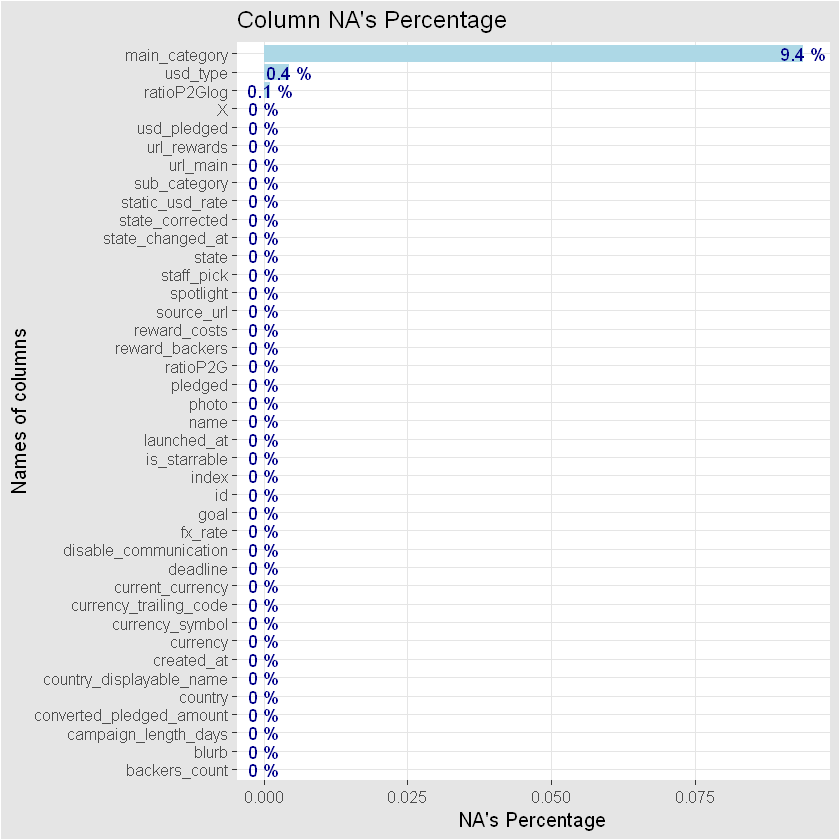

In [5]:
column_nas = function(dataframe) {
        na_vals = sapply(dataframe , function(x) mean(is.na(x)))
        nas = data.frame(column_names = names(na_vals) , na_percentage = as.vector(na_vals))
        ggplot(nas , aes(x = reorder(column_names , na_percentage) , y = na_percentage , label = paste(as.character(round(na_percentage * 100 , 1)) , "%"))) +
                geom_col(fill = "lightblue") + xlab('Names of columns') + ylab("NA's Percentage") +
                labs(title = "Column NA's Percentage") + geom_text(color = 'darkblue') + theme_igray() + coord_flip()
}

column_nas(data)

## What are the basics?


A **project** is a finite work with a clear goal that you’d like to bring to life. Think albums, books, or films. 

The **funding goal** is the amount of money that a creator needs to complete their project. 

Funding on Kickstarter is **all-or-nothing**. No one will be charged for a pledge towards a project unless it reaches its funding goal. This way, creators always have the budget they scoped out before moving forward. 

A **creator** is the person or team behind the project idea, working to bring it to life. 

**Backers** are folks who **pledge** money to join creators in bringing projects to life. Kickstarter is not a store, backers support a creative process.

**Rewards** are a creator's chance to share a piece of their project with their backer community. Typically, these are one-of-a-kind experiences, limited editions, or copies of the creative work being produced. 

## Project Status


`summarise()` ungrouping output (override with `.groups` argument)



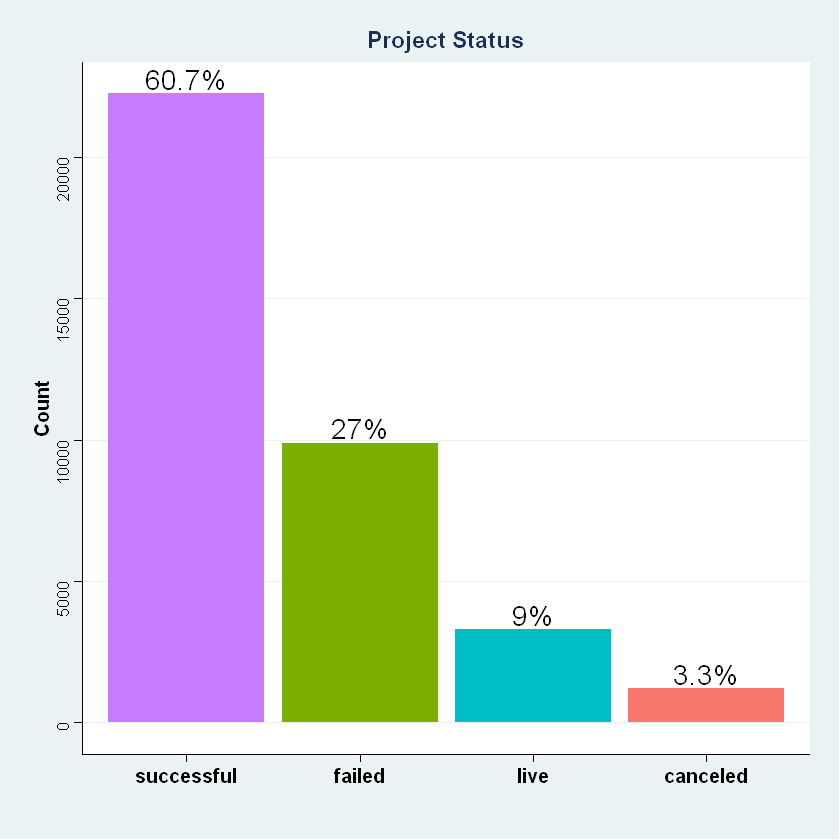

In [6]:
data %>% group_by(state) %>% 
        summarise(count = n() , percentage = paste(round((count / dim(data)[1])*100 , 1) , '%' , sep = '')) %>% 
        ggplot(aes(x = reorder(state , desc(count)) , y = count , fill = state , label = percentage)) + 
        geom_col() + theme_stata() +  geom_text(size = 6 , vjust = -0.2) +
        labs(x = '' , y = 'Count') + theme(legend.position = 'none') + 
        theme(axis.text.x = element_text(size = 13 , face = 'bold')) +
ggtitle("Project Status") +
  theme(plot.title=element_text(hjust=0.5,size=14, face="bold"), axis.title=element_text(size=12, face="bold"), 
        axis.text.x=element_text(size=12, face = "bold"), legend.position="null") 

### Barplot with corrected state

`summarise()` ungrouping output (override with `.groups` argument)



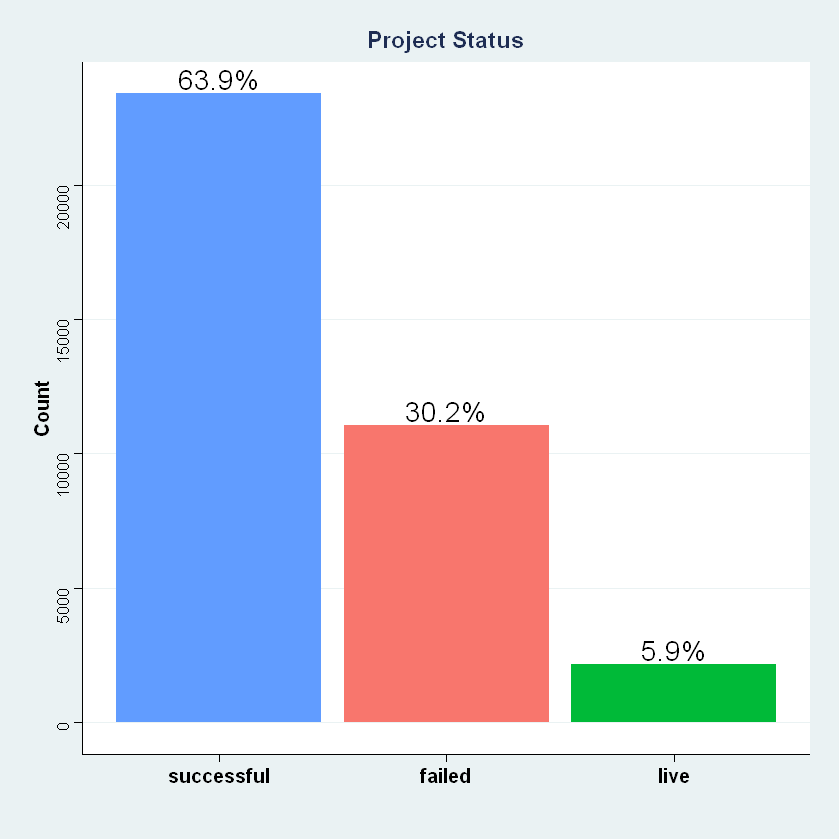

In [8]:
data %>% group_by(state_corrected) %>% 
        summarise(count = n() , percentage = paste(round((count / dim(data)[1])*100 , 1) , '%' , sep = '')) %>% 
        ggplot(aes(x = reorder(state_corrected , desc(count)) , y = count , fill = state_corrected , label = percentage)) + 
        geom_col() + geom_text(size = 6 , vjust = -0.2) + 
        labs(x = '' , y = 'Count') + theme_stata() + theme(legend.position = 'none') + 
 ggtitle("Project Status") +
  theme(plot.title=element_text(hjust=0.5,size=14, face="bold"), axis.title=element_text(size=12, face="bold"), 
        axis.text.x=element_text(size=12, face = "bold"), legend.position="null")

Overall, 63.9% of the projects were found to be successful, 30.2% failed and 5.9% which are still live. Hence, more projects are succesful than failed. "Cancelled" projects are removed from our dataset.

## Campaign Length

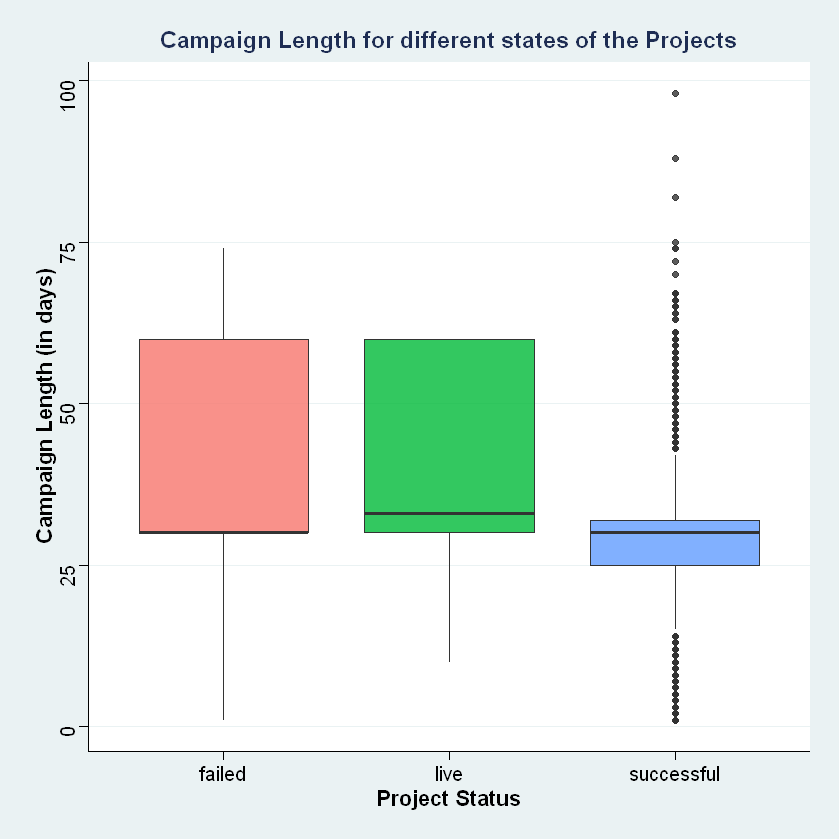

In [9]:
data %>% ggplot(aes(x = as.factor(state_corrected) , y = campaign_length_days , fill = state_corrected)) + geom_boxplot(alpha = 0.8) + 
        theme_stata() + theme(legend.position = 'none') + scale_y_continuous() + scale_x_discrete() +
theme_stata() + 
ggtitle("Campaign Length for different states of the Projects") + xlab("Project Status") + ylab("Campaign Length (in days)") + 
  theme(plot.title=element_text(hjust=0.5, size=14, face="bold"), axis.title=element_text(size=13, face="bold"), 
        axis.text=element_text(size=12), legend.position="null") 

As seen from the above Boxplot, successful projects have a lot of outliers, but the size of the box is small indicating a high concentration at around 30 days which makes it the ideal campaign length for successful projects. The upper quartile for failed and live projects is big, indicating that there is right skewness in the distribution after 30 days.

Warning message:
"Removed 11106 rows containing non-finite values (stat_boxplot)."


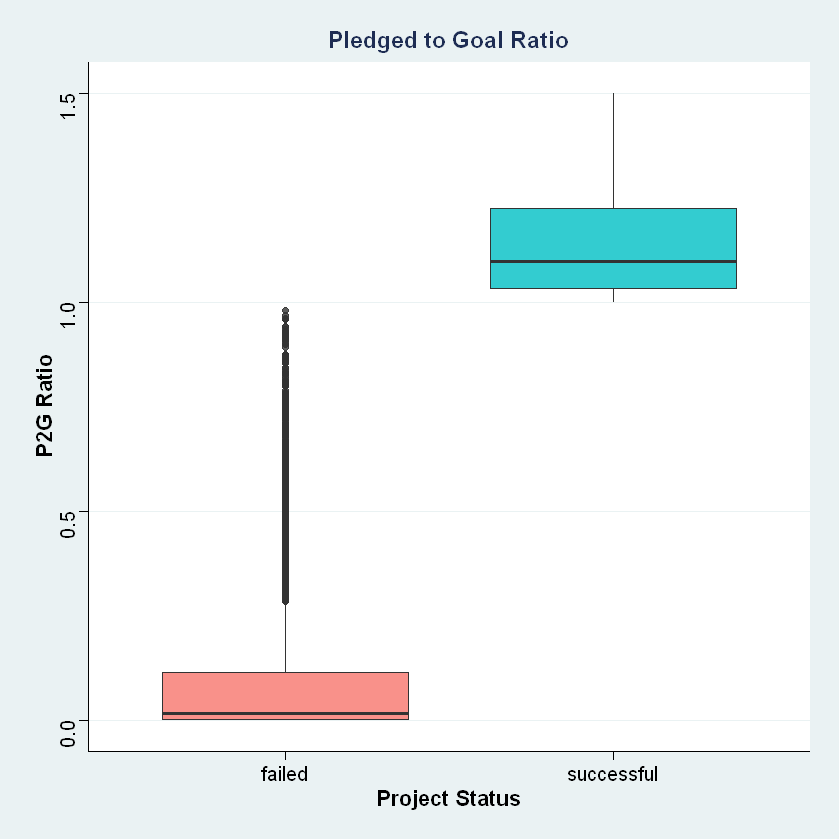

In [11]:
data %>% filter(state %in% c('successful' , 'failed')) %>%
        ggplot(aes(x = state , y = ratioP2G , fill = state)) + geom_boxplot(alpha = 0.8) + 
        ylim(0 , 1.5) + theme_stata() + 
ggtitle("Pledged to Goal Ratio") + xlab("Project Status") + ylab("P2G Ratio") + 
  theme(plot.title=element_text(hjust=0.5, size=14, face="bold"), axis.title=element_text(size=13, face="bold"), 
        axis.text=element_text(size=12), legend.position="null") 

From the above Boxplot, we can see that typically failed projects won’t even reach 20% of its required goal but successful projects get 5% to 25% excess amount pledged over the set goal.

In [12]:
# Get only successful/failed projects
data <- data[data$state_corrected %in% c("successful", "failed"), ]

In [13]:
table(data$state_corrected)
table(data$state)


    failed successful 
     11057      23397 


  canceled     failed       live successful 
      1197       9895       1110      22252 

In [14]:
NROW(data$state_corrected)
NROW(data$state)

[1] 34454

[1] 34454

In [15]:
# Copying corrected state to state column
data$state = data$state_corrected

In [16]:
table(data$state_corrected)
table(data$state)


    failed successful 
     11057      23397 


    failed successful 
     11057      23397 

## What types of projects are most popular?

`summarise()` ungrouping output (override with `.groups` argument)



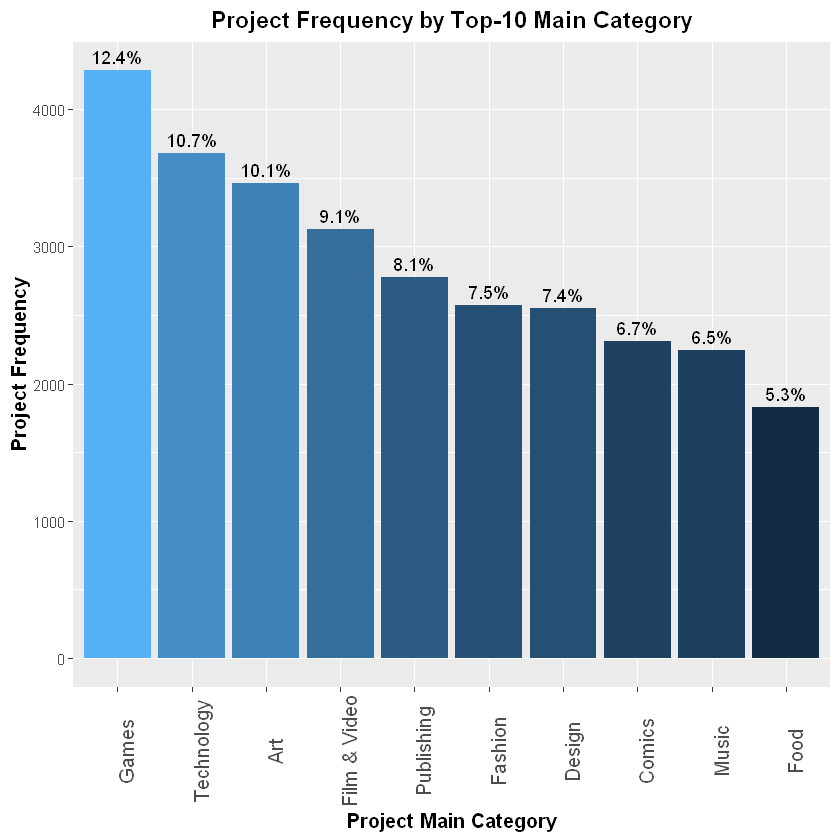

In [17]:
maincat.freq <- data %>%
  group_by(main_category) %>%
  summarize(count = n() , percentage = paste(round((count / dim(data)[1])*100 , 1) , '%' , sep = '')) %>%
  arrange(desc(count))


maincat.freq$category <- factor(maincat.freq$main_category, levels=maincat.freq$main_category)

ggplot(head(na.omit(maincat.freq), 10), aes(category, count, fill=count)) + geom_bar(stat="identity") + 
  ggtitle("Project Frequency by Top-10 Main Category") + xlab("Project Main Category") + ylab("Project Frequency") + 
  geom_text(aes(label = percentage), vjust=-0.5) + 
  theme(plot.title=element_text(hjust=0.5,size=14, face="bold"), axis.title=element_text(size=12, face="bold"), 
        axis.text.x=element_text(size=12, angle=90), legend.position="null")

`summarise()` ungrouping output (override with `.groups` argument)



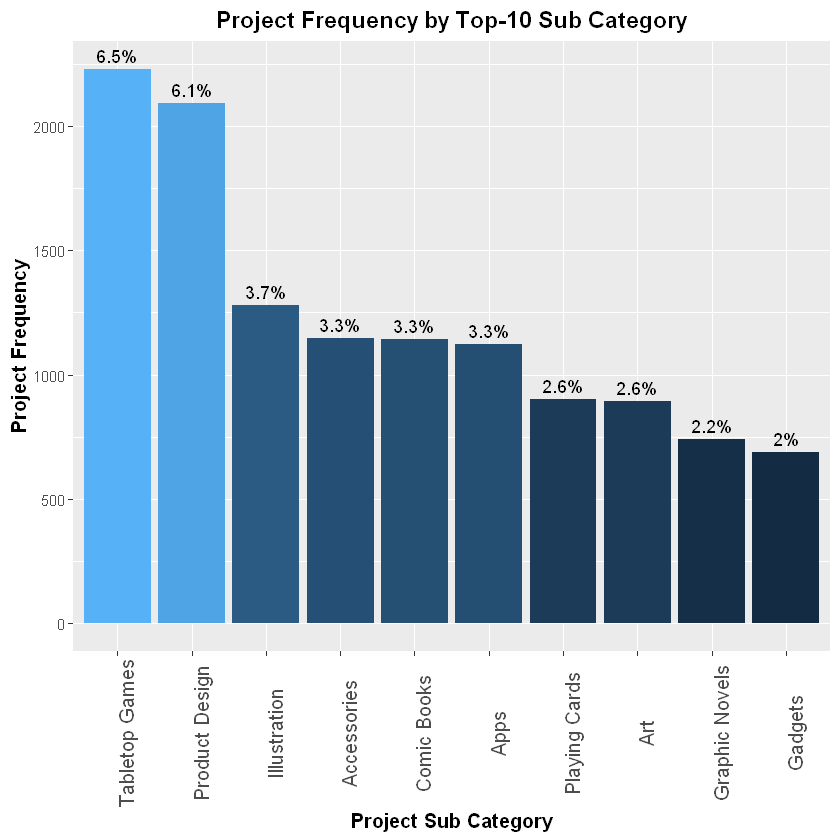

In [18]:
subcat.freq <- data %>%
  group_by(sub_category) %>%
  summarize(count = n() , percentage = paste(round((count / dim(data)[1])*100 , 1) , '%' , sep = '')) %>%
  arrange(desc(count))


subcat.freq$category <- factor(subcat.freq$sub_category, levels=subcat.freq$sub_category)

ggplot(head(na.omit(subcat.freq), 10), aes(category, count, fill=count)) + geom_bar(stat="identity") + 
  ggtitle("Project Frequency by Top-10 Sub Category") + xlab("Project Sub Category") + ylab("Project Frequency") + 
  geom_text(aes(label = percentage), vjust=-0.5) + 
  theme(plot.title=element_text(hjust=0.5,size=14, face="bold"), axis.title=element_text(size=12, face="bold"), 
        axis.text.x=element_text(size=12, angle=90), legend.position="null")

After filtering out null values from our dataset, the most popular main categories by count are found to be Games, Technology and Art at 12.4%, 10.7% and 10.1% respectively. The most popular sub-categories are found to be Tabletop games (like board games, dice games, etc.) and Product design (like modular shelf, custom designed backpack, etc.) at 6.5% and 6.1% respectively

## What types of projects are being funded?

`summarise()` ungrouping output (override with `.groups` argument)



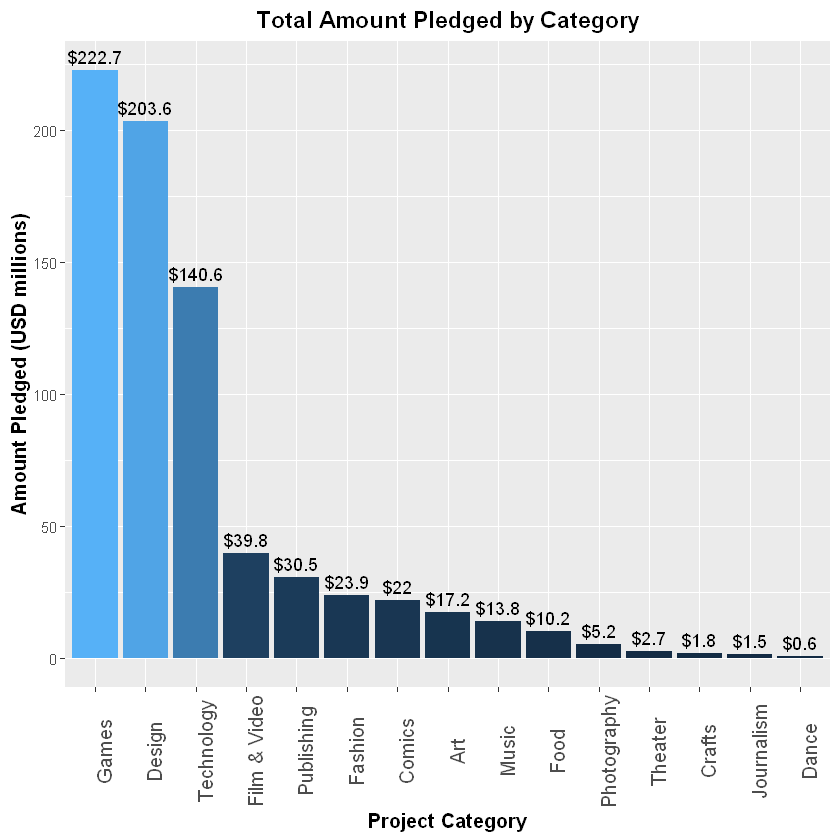

In [21]:
pledged_total <- data %>%
  group_by(main_category) %>%
  summarize(total=sum(usd_pledged)) %>%
  arrange(desc(total))

pledged_total$main_category <- factor(pledged_total$main_category, levels=pledged_total$main_category)

ggplot(na.omit(pledged_total), aes(main_category, total/1000000, fill=total)) + geom_bar(stat="identity") + 
  ggtitle("Total Amount Pledged by Category") + xlab("Project Category") + 
  ylab("Amount Pledged (USD millions)") + 
  geom_text(aes(label=paste0("$", round(total/1000000,1))), vjust=-0.5)  + 
  theme(plot.title=element_text(hjust=0.5,size=14, face="bold"), axis.title=element_text(size=12, face="bold"), 
        axis.text.x=element_text(size=12, angle=90), legend.position="null") 

`summarise()` ungrouping output (override with `.groups` argument)



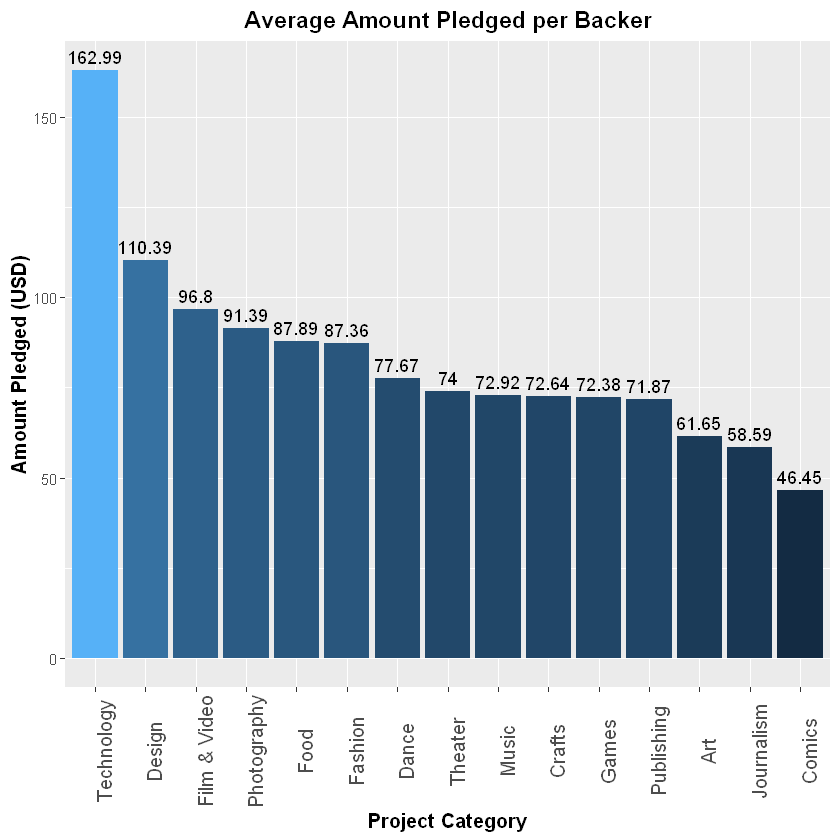

In [22]:
pledged.avg <- data %>%
  group_by(main_category) %>%
  summarize(pledged=sum(usd_pledged), backers=sum(backers_count)) %>%
  mutate(avg=pledged/backers) %>%
  arrange(desc(avg))

pledged.avg$main_category <- factor(pledged.avg$main_category, levels=pledged.avg$main_category)

ggplot(na.omit(pledged.avg), aes(main_category, avg, fill=avg)) + geom_bar(stat="identity") + 
  ggtitle("Average Amount Pledged per Backer") + xlab("Project Category") + 
  ylab("Amount Pledged (USD)") + 
  geom_text(aes(label=paste0(round(avg,2))), vjust=-0.5) + 
  theme(plot.title=element_text(hjust=0.5,size=14, face="bold"), axis.title=element_text(size=12, face="bold"), 
        axis.text.x=element_text(size=12, angle=90), legend.position="null") 

`summarise()` ungrouping output (override with `.groups` argument)



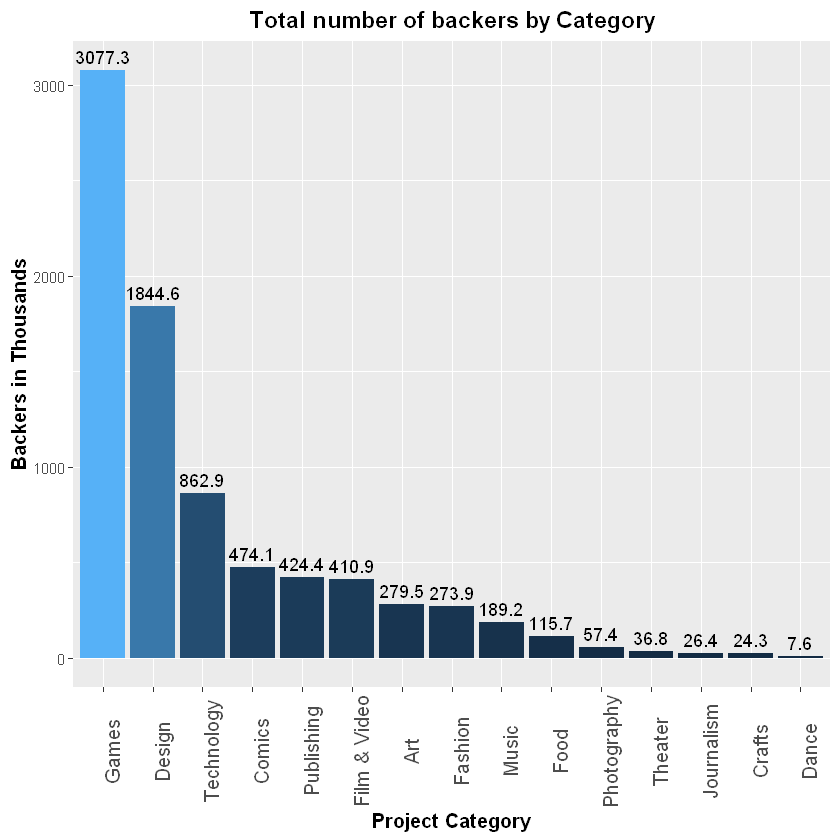

In [23]:
backers.tot <- data %>%
  group_by(main_category) %>%
  summarize(total=sum(backers_count)) %>%
  arrange(desc(total))

backers.tot$main_category <- factor(backers.tot$main_category, levels=backers.tot$main_category)

ggplot(na.omit(backers.tot), aes(main_category, total/1000, fill=total)) + geom_bar(stat="identity") + 
  ggtitle("Total number of backers by Category") + xlab("Project Category") + 
  ylab("Backers in Thousands") +  
  geom_text(aes(label=paste0(round(total/1000,1))), vjust=-0.5) +
  theme(plot.title=element_text(hjust=0.5,size=14, face="bold"), axis.title=element_text(size=12, face="bold"), 
        axis.text.x=element_text(size=12, angle=90), legend.position="null") 

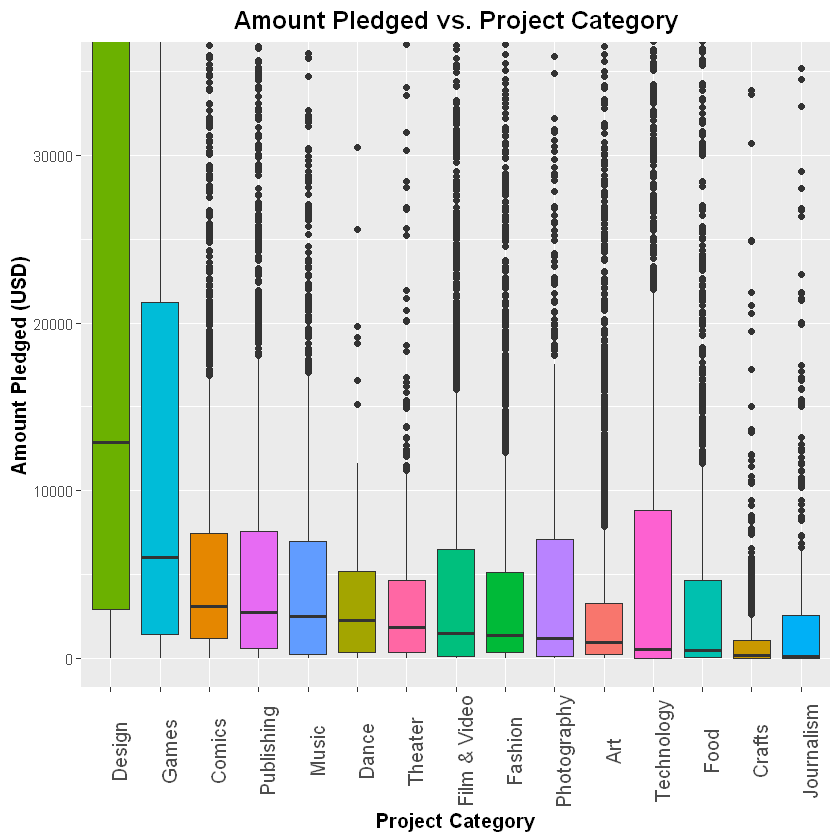

In [24]:
ggplot(na.omit(data), aes(x=reorder(main_category, -usd_pledged, FUN = median), y = usd_pledged, fill=main_category)) + geom_boxplot() + 
  ggtitle("Amount Pledged vs. Project Category") + xlab("Project Category") + 
  ylab("Amount Pledged (USD)") + 
  theme(plot.title=element_text(size=15, face="bold", hjust=0.5), 
        axis.title=element_text(size=12, face="bold"), 
        axis.text.x=element_text(size=12, angle=90), legend.position="null") + 
  coord_cartesian(ylim=c(0,35000))

## How much funding is required?

`summarise()` ungrouping output (override with `.groups` argument)



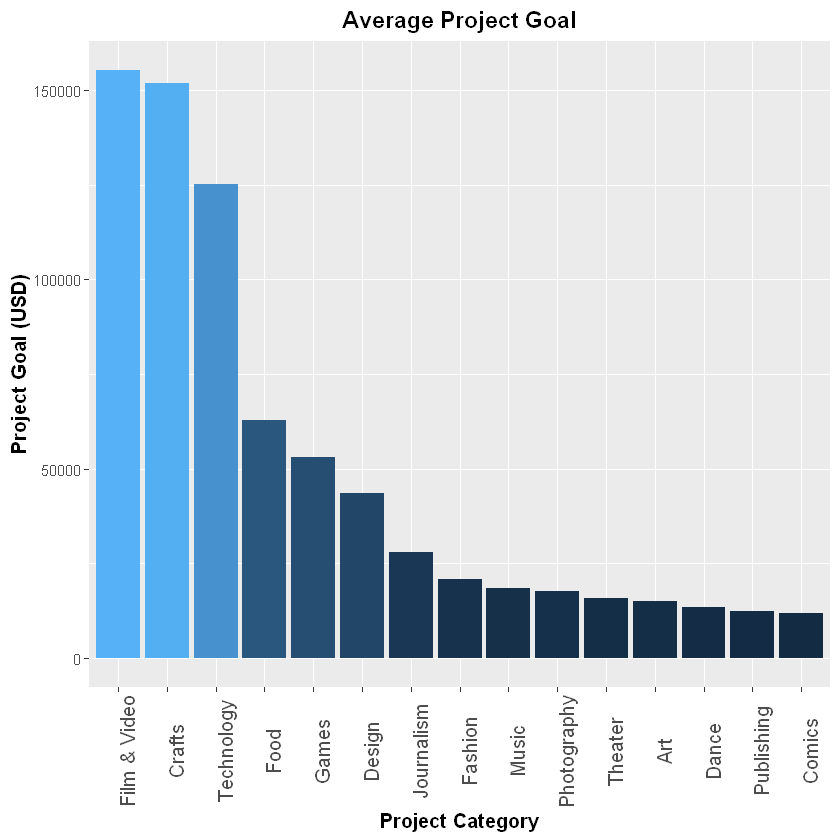

In [25]:
goal.avg <- data %>%
  group_by(main_category) %>%
  summarize(goal=sum(goal), projects=n()) %>%
  mutate(avg=goal/projects) %>%
  arrange(desc(avg))

goal.avg$main_category <- factor(goal.avg$main_category, levels=goal.avg$main_category)

ggplot(na.omit(goal.avg), aes(main_category, avg, fill=avg)) + geom_bar(stat="identity") + 
  ggtitle("Average Project Goal") + xlab("Project Category") + ylab("Project Goal (USD)") + 
  theme(plot.title=element_text(hjust=0.5,size=14, face="bold"), axis.title=element_text(size=12, face="bold"), 
        axis.text.x=element_text(size=12, angle=90), legend.position="null")

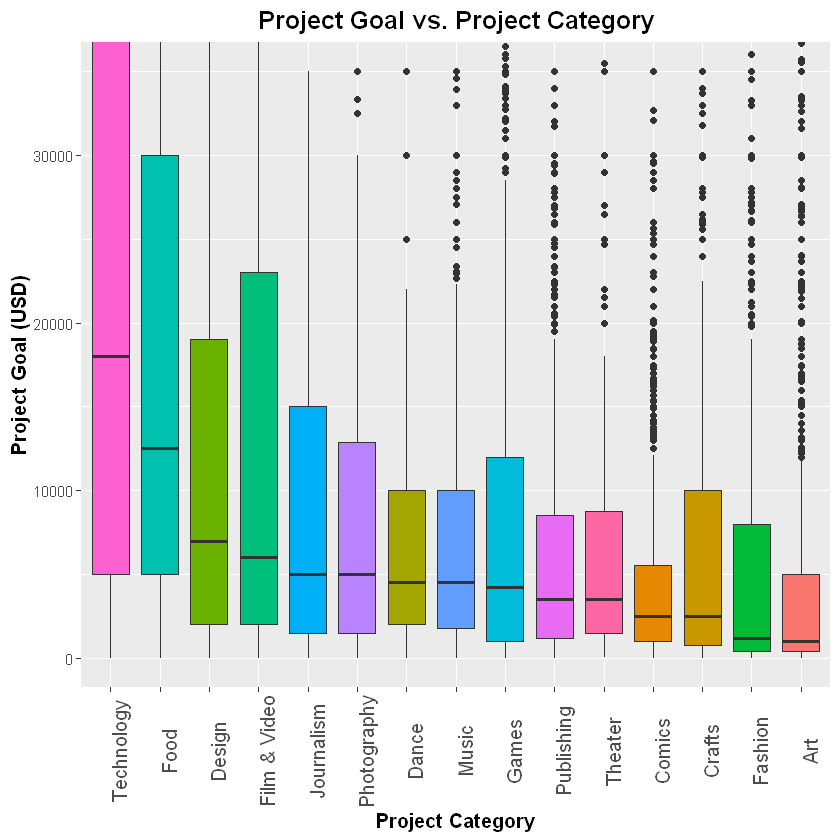

In [26]:
ggplot(na.omit(data), aes(x=reorder(main_category, -goal, FUN = median), goal, fill=main_category)) + geom_boxplot() + 
  ggtitle("Project Goal vs. Project Category") + xlab("Project Category") + 
  ylab("Project Goal (USD)") + 
  theme(plot.title=element_text(size=15, face="bold", hjust=0.5), 
        axis.title=element_text(size=12, face="bold"), 
        axis.text.x=element_text(size=12, angle=90), legend.position="null") + 
  coord_cartesian(ylim=c(0,35000))

`summarise()` regrouping output by 'main_category' (override with `.groups` argument)



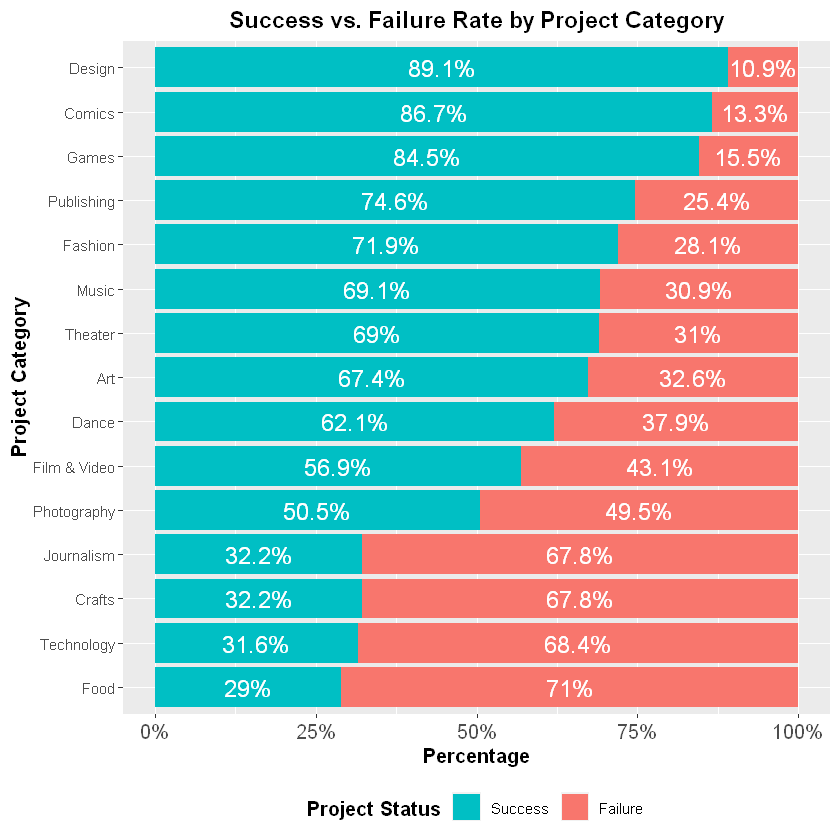

In [27]:
state.pct <- data %>%
  filter(state %in% c("successful", "failed")) %>%
  group_by(main_category, state) %>%
  summarize(count=n()) %>%
  mutate(pct=count/sum(count)) %>%
  arrange(desc(state), pct)

state.pct$main_category <- factor(state.pct$main_category, 
                                  levels=state.pct$main_category[1:(nrow(state.pct)/2)])

ggplot(na.omit(state.pct), aes(main_category, pct, fill=state)) + geom_bar(stat="identity") + 
  ggtitle("Success vs. Failure Rate by Project Category") + 
  xlab("Project Category") + ylab("Percentage") + scale_y_continuous(labels=scales::percent) + 
  scale_fill_discrete(name="Project Status", breaks=c("successful", "failed"),
                      labels=c("Success", "Failure")) + 
  geom_text(aes(label=paste0(round(pct*100,1),"%")), position=position_stack(vjust=0.5), 
            colour="white", size=5) + 
  theme(plot.title=element_text(hjust=0.5, size=14, face="bold"), axis.title=element_text(size=12, face="bold"), 
        axis.text.x=element_text(size=12), legend.position="bottom", 
        legend.title=element_text(size=12, face="bold")) + coord_flip()

The above Boxplots shows the distribution of Project goal and the amount pledged with its respective category arranged in descending order of their medians.
When we see the Project goal in Technology, the median is very high around $17,000 USD but when we see the same category in the Amount pledged plot, we can see that the pledged amount is really low. Even though there are many outliers, from the third plot we can see that the success rate of Technology category is among the lowest i.e. 31.6%.
Similarly, when we see the design category, the pledged amount is very high since the goal is kept relatively low. And hence, the success rate is highest for the design category i.e. 89.1%.
From these plots, it can be inferred that lower goal leads to a higher amount pledged and hence there is a high chance of the project being successful.


## Does project length affect success rate?

Kickstarter was founded in 2009 and until 2011, the maximum length of the project campaigns was 90 days. But since 2011, the max campaign length is capped at 60 days.
This quote is taken from the official Kickstarter website (below is the reference), “Projects on Kickstarter can last anywhere from 1 - 60 days. We've done some research, and found that projects lasting any longer are rarely successful. We recommend setting your campaign at 30 days or less.”
Ref: https://help.kickstarter.com/hc/en-us/articles/115005128434-What-is-the-maximum-project-duration-#:~:text=Projects%20on%20Kickstarter%20can%20last,at%2030%20days%20or%20less. 


In [28]:
data$length <- data$campaign_length_days

length.pct <- data %>%
  filter(state %in% c("successful", "failed"), length <= 60) %>%
  group_by(length, state) %>%
  summarize(count=n()) %>%
  mutate(pct=count/sum(count))

p = ggplot(length.pct[length.pct$state=="successful",], aes(length, pct)) + 
  geom_point(colour="blue", size=2.5) + ggtitle("Success Rate vs. Campaign Length") + 
  xlab("Campaign Length (Days)") + ylab("Success Rate (%)") + 
  scale_x_continuous(breaks=c(0,10,20,30,40,50,60)) + geom_vline(xintercept=30, colour="red") + 
theme_stata() +
  theme(plot.title=element_text(size=18, face="bold", hjust=0.5), axis.title=element_text(size=12, face="bold"))


`summarise()` regrouping output by 'length' (override with `.groups` argument)



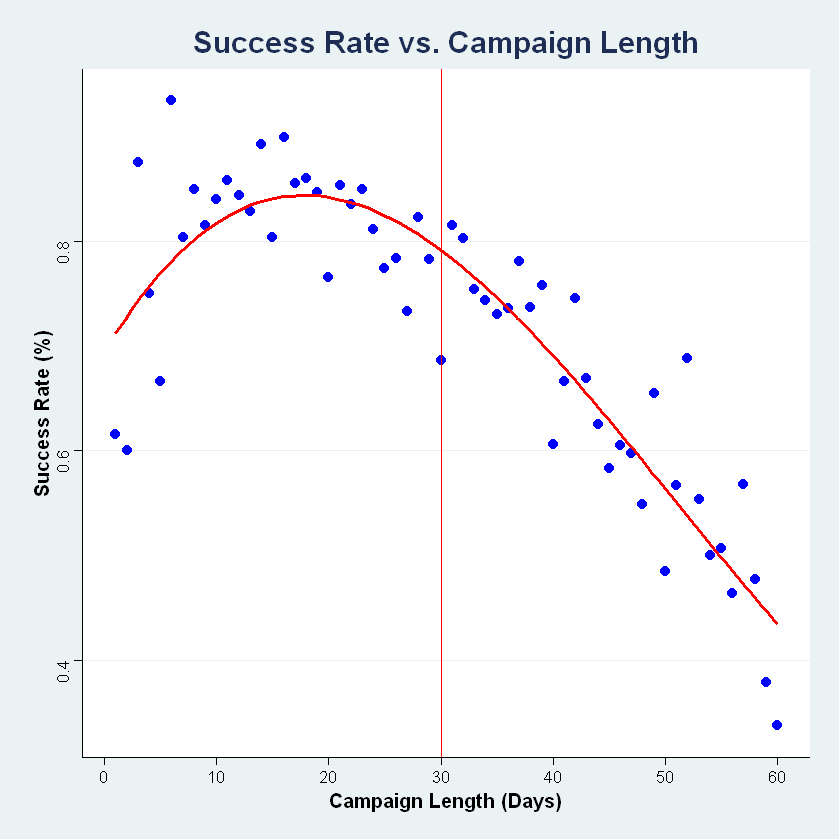

In [29]:
p + stat_smooth(method="lm", se=TRUE, fill=NA,
                formula=y ~ poly(x, 3, raw=TRUE),colour="red")

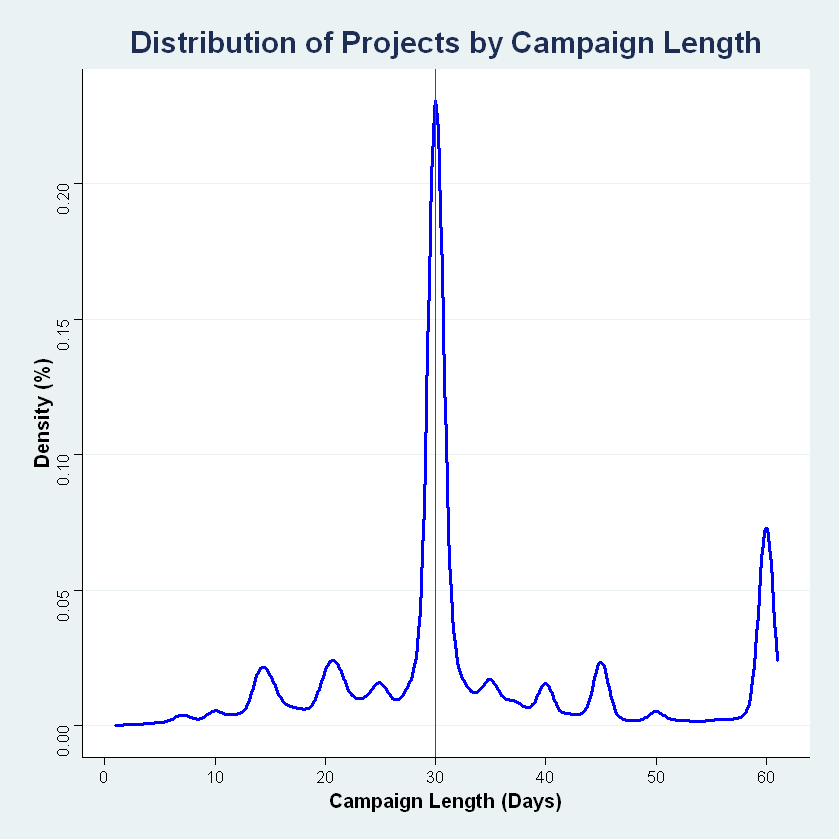

In [30]:
ggplot(data[data$length <= 61,], aes(length)) + geom_density(colour="blue", size=1) + 
  ggtitle("Distribution of Projects by Campaign Length") + xlab("Campaign Length (Days)") + 
  ylab("Density (%)") + scale_x_continuous(breaks=c(0,10,20,30,40,50,60)) + 
  geom_vline(xintercept=30, colour="red") + theme_stata() +
  theme(plot.title=element_text(size=18, face="bold", hjust=0.5), axis.title=element_text(size=12, face="bold"))


We plotted campaign length vs success rate with a non-linear regression of 3rd order polynomial and found out that the success rate during the initial few days is higher. After 30 days the probability of the project reaching its goal is significantly reduced. 
From the second plot, we can see a peek at the 30th day which is the recommended length by Kickstarter. 
Our theory is that having more time does not create a sense of urgency. Instead, it makes it easier for backers to procrastinate, and sometimes they forget to come back at all. When a project launches the creator’s most avid fans rush to show their support and as time runs out, people who have been sitting on the side-lines are motivated to finally take action. And hence, choosing a shorter duration better positions a project for success.


## Projects by year

In [31]:
data$launched_at <- as.Date(data$launched_at, "%d/%m/%Y")

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
"Continuous limits supplied to discrete scale.
Did you mean `limits = factor(...)` or `scale_*_continuous()`?"


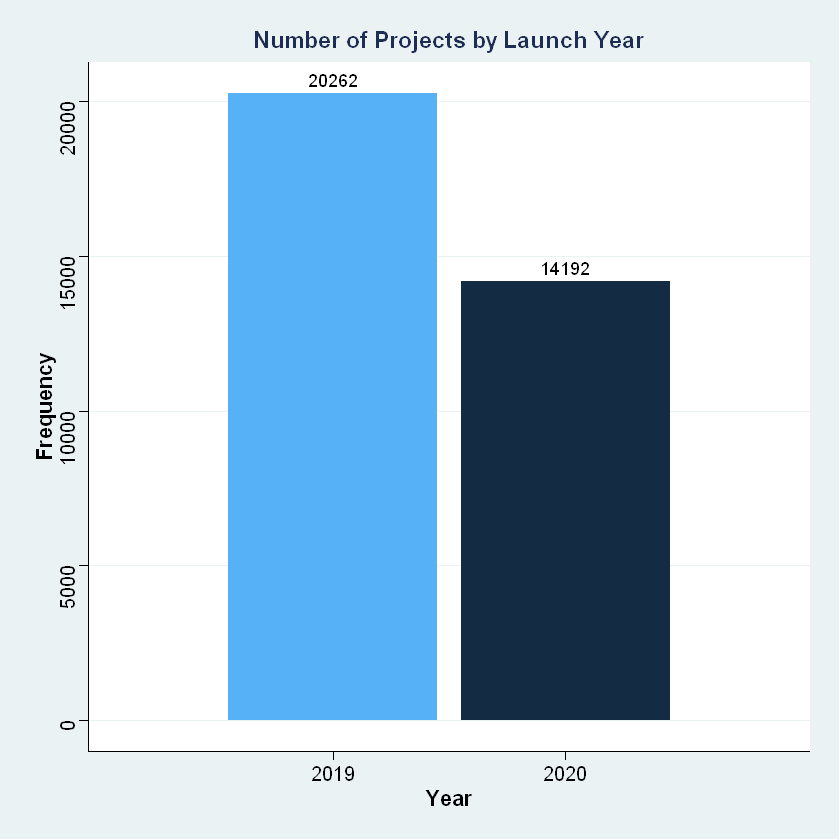

In [32]:
year.freq <- data %>%
  group_by(year=year(launched_at)) %>%
  summarize(count=n())

ggplot(year.freq, aes(year, count, fill=count)) + geom_bar(stat="identity") + 
  ggtitle("Number of Projects by Launch Year") + xlab("Year") + ylab("Frequency") + 
  scale_x_discrete(limits=c(2019:2020)) + 
  geom_text(aes(label=paste0(count)), vjust=-0.5) + theme_stata() + 
  theme(plot.title=element_text(hjust=0.5, size=14, face="bold"), axis.title=element_text(size=13, face="bold"), 
        axis.text=element_text(size=12), legend.position="null") 

In [33]:
Year_2019 <- data %>%
  mutate(year = format(as.Date(launched_at, "%Y-%m-%d"), "%Y")) %>%
  mutate(month = format(as.Date(launched_at, "%Y-%m-%d"), "%m")) %>%
  filter(year %in% c('2019')) %>%
  group_by(year, month) %>%
  summarise(count=n()) 

Year_2020 <- data %>%
  mutate(year = format(as.Date(launched_at, "%Y-%m-%d"), "%Y")) %>%
  mutate(month = format(as.Date(launched_at, "%Y-%m-%d"), "%m")) %>%
  filter(year %in% c('2020')) %>%
  filter(!month %in% c('08')) %>%
  group_by(year, month) %>%
  summarise(count=n())

`summarise()` regrouping output by 'year' (override with `.groups` argument)

`summarise()` regrouping output by 'year' (override with `.groups` argument)



In [34]:
Year_2019

year,month,count
<chr>,<chr>,<int>
2019,01,829
2019,02,1154
2019,03,1631
2019,04,1658
2019,05,2000
2019,06,1792
2019,07,1737
2019,08,1856
2019,09,1808


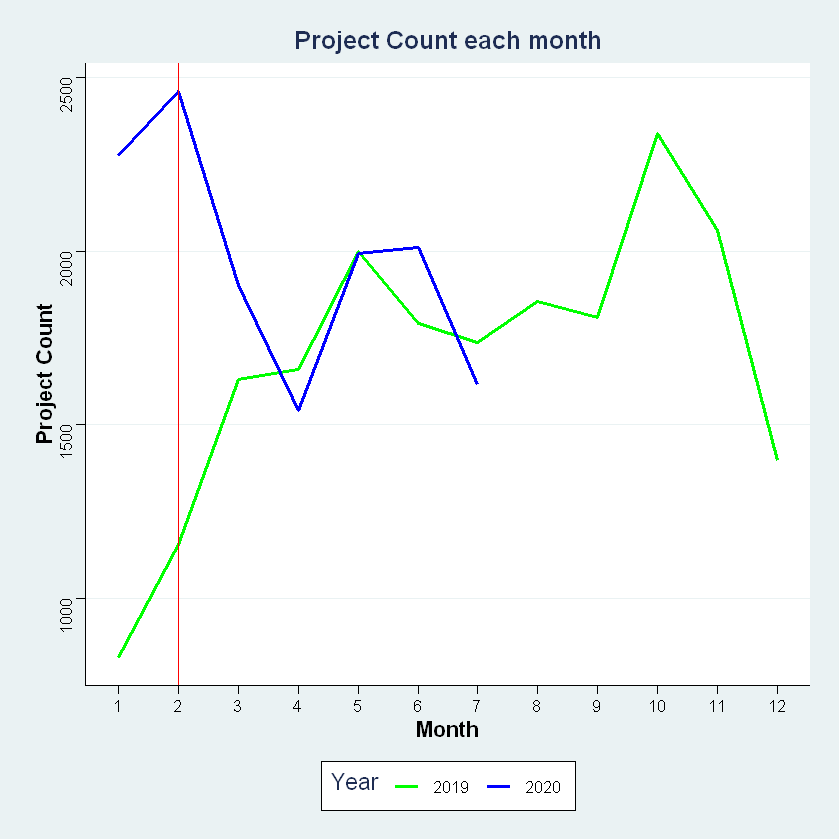

In [35]:
ggplot() + 
  geom_line(data = Year_2019, aes(x=as.numeric(month), y = count, color = "2019"), size = 1) +
  geom_line(data = Year_2020, aes(x=as.numeric(month), y = count, color = "2020"), size = 1)+
  labs(title="Project Count each month", x= "Month", y = "Project Count") + 
  theme_stata() + scale_x_continuous(breaks=seq(1,12, 1)) +
scale_color_manual(name="Year", values = c("green","blue")) +
geom_vline(xintercept=2, colour="red") + 
theme(plot.title=element_text(hjust=0.5, size=15, face="bold"), axis.title=element_text(size=13, face="bold")) 

In [36]:
Year_2019 <- data %>%
  mutate(year = format(as.Date(launched_at, "%Y-%m-%d"), "%Y")) %>%
  mutate(month = format(as.Date(launched_at, "%Y-%m-%d"), "%m")) %>%
  filter(country %in% c('USA')) %>%
  filter(year %in% c('2019')) %>%
  group_by(year, month, state) %>%
  summarise(count=n()) %>%
  mutate(Perc = count/sum(count)) %>%
  filter(state == "successful")

Year_2020 <- data %>%
  mutate(year = format(as.Date(launched_at, "%Y-%m-%d"), "%Y")) %>%
  mutate(month = format(as.Date(launched_at, "%Y-%m-%d"), "%m")) %>%
  filter(country %in% c('USA')) %>%
  filter(year %in% c('2020')) %>%
  filter(!month %in% c('08')) %>%
  group_by(year, month, state) %>%
  summarise(count=n()) %>%
  mutate(Perc = count/sum(count)) %>%
  filter(state == "successful")

`summarise()` regrouping output by 'year', 'month' (override with `.groups` argument)

`summarise()` regrouping output by 'year', 'month' (override with `.groups` argument)



In [37]:
Year_2020

year,month,state,count,Perc
<chr>,<chr>,<chr>,<int>,<dbl>
2020,01,successful,939,0.6986607
2020,02,successful,1070,0.7466853
2020,03,successful,716,0.6904532
2020,04,successful,597,0.7132616
2020,05,successful,798,0.7514124
2020,06,successful,839,0.7945076
2020,07,successful,836,0.8809273


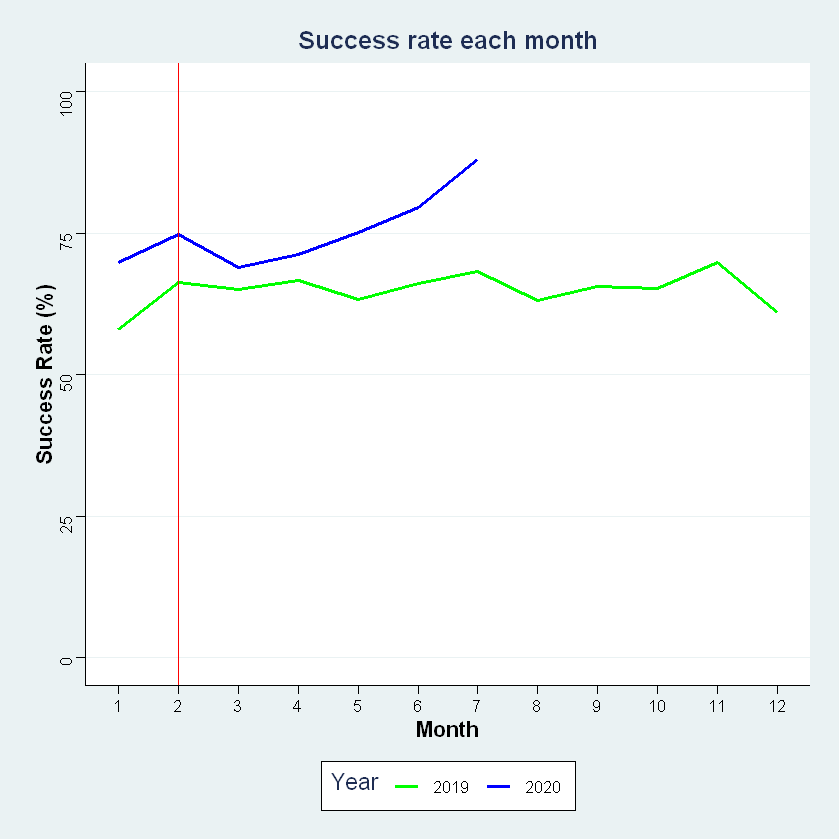

In [38]:
ggplot() + 
  geom_line(data = Year_2019, aes(x=as.numeric(month), y = round(Perc*100, digits = 1), color = "2019"), size = 1) +
  geom_line(data = Year_2020, aes(x=as.numeric(month), y = round(Perc*100, digits = 1), color = "2020"), size = 1)+
  coord_cartesian(ylim = c(0,100)) +
  labs(title="Success rate each month", x= "Month", y = "Success Rate (%)") + 
  theme_stata() + scale_x_continuous(breaks=seq(1,12, 1)) +
scale_color_manual(name="Year", values = c("green","blue")) +
geom_vline(xintercept=2, colour="red") + 
theme(plot.title=element_text(hjust=0.5, size=15, face="bold"), axis.title=element_text(size=13, face="bold"))

Since the US was highly affected country and Kickstarter being highly used in the US as compared to other countries, we just considered US data for this analysis. Blue line represents 2020, and the green one represents 2019. Considering the pandemic started in February of 2020, represented by red x-intercept, from the line plots we can see that 2020 started off really well in terms of Project count and Success rate.  As compared to last year’s statistics, 2020 is at par or even better than 2019 in terms of project count and success rate.

`summarise()` regrouping output by 'year' (override with `.groups` argument)

Warning message:
"Continuous limits supplied to discrete scale.
Did you mean `limits = factor(...)` or `scale_*_continuous()`?"


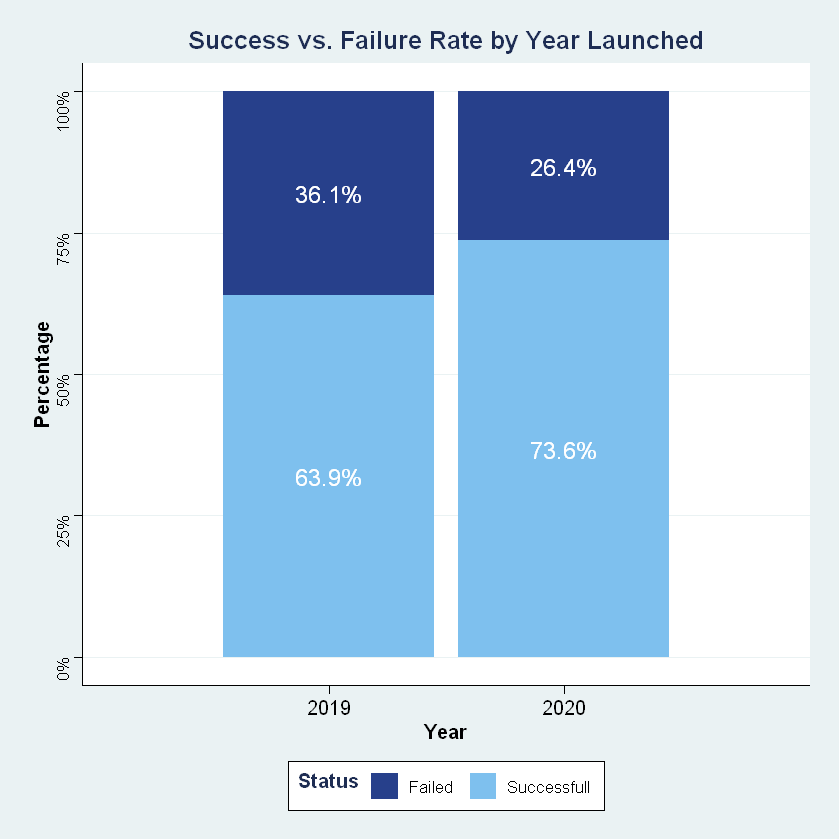

In [39]:
state.pct2 <- data %>%
  filter(state %in% c("successful", "failed")) %>%
  group_by(year=year(launched_at), state) %>%
  summarize(count=n()) %>%
  mutate(pct=count/sum(count)) %>%
  arrange(desc(state))

ggplot(state.pct2, aes(year, pct, fill=state)) + geom_bar(stat="identity") + 
  ggtitle("Success vs. Failure Rate by Year Launched") + 
  xlab("Year") + ylab("Percentage") + scale_x_discrete(limits=c(2019,2020)) + 
  scale_y_continuous(labels=scales::percent) + 
   scale_fill_manual(name= "Status", labels = c("Failed", "Successfull"),  values = c("royalblue4", "skyblue2")) + 
  geom_text(aes(label=paste0(round(pct*100,1),"%")), position=position_stack(vjust=0.5), 
            colour="white", size=5) + theme_stata() + 
  theme(plot.title=element_text(hjust=0.5, size =15, face = "bold"), axis.title=element_text(size=12, face="bold"), 
        axis.text.x=element_text(size=12), legend.position="bottom", 
        legend.title=element_text(size=12, face="bold")) 

Our dataset contained data ranging from January of 2019 to July of 2020. And, from the above plot, we can see that the success rate in 2020 has increased by around 10% as compared to 2019, from 63.9% to 73.6%.